## Importing-libraries

In [10]:
import category_encoders as ce
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Label Encoding or Ordinal Encoding

#### 1. using Libraries

In [2]:
train_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']})

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'phd':5}}])

#Original data
print(train_df)

        Degree
0  High school
1      Masters
2      Diploma
3    Bachelors
4    Bachelors
5      Masters
6          Phd
7  High school
8  High school


In [3]:
encoder.fit_transform(train_df)

,Degree
0,1.0
1,4.0
2,2.0
3,3.0
4,3.0
5,4.0
6,-1.0
7,1.0
8,1.0


#### 2. Using python function

In [6]:
#function for ordinal encoding
def ordinal_encoder(data, column_name, mapping):
    return [{**row, column_name: mapping.get(row[column_name], -1)} for row in data]


train_data = [
    {'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'},
    {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'},
    {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}
]

# User-defined mapping
degree_mapping = {'None': 0, 'High school': 1, 'Diploma': 2, 
                  'Bachelors': 3, 'Masters': 4, 'Phd': 5}

# Perform ordinal encoding
encoded_data = ordinal_encoder(train_data, 'Degree', degree_mapping)

#  results
print("Original Data:")
print(train_data)

print("\nEncoded Data:")
print(encoded_data)


Original Data:
[{'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'}, {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'}, {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}]

Encoded Data:
[{'Degree': 1}, {'Degree': 4}, {'Degree': 2}, {'Degree': 3}, {'Degree': 3}, {'Degree': 4}, {'Degree': 5}, {'Degree': 1}, {'Degree': 1}]


### <B> Comparision :<BR>

Both ce.OrdinalEncoder and a custom ordinal encoding function produce the same accuracy if the mapping is defined correctly. However, ce.OrdinalEncoder is faster and more efficient for large datasets due to its optimized, vectorized implementation using Pandas, whereas the custom function relies on loops and dictionary lookups, making it slower and less scalable. The library-based approach is easier to use, handles errors gracefully, and scales well for larger DataFrames, but it requires the category_encoders library as a dependency. On the other hand, the custom function is a lightweight, dependency-free pure Python solution that is fully customizable and ideal for small datasets or quick tasks. For large datasets and performance-critical applications, ce.OrdinalEncoder is the better choice, while the custom function works well for smaller use cases.

#### MinMax scaling

#### 1. Using python functions

In [15]:
def min_max_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'min': min(col_values), 'max': max(col_values)}
        
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            min_val = column_stats[col]['min']
            max_val = column_stats[col]['max']
            value = row[col] if row[col] is not None else 0  
            
            # Perform MinMax scaling
            if max_val != min_val:  
                scaled_row[col] = (value - min_val) / (max_val - min_val)
            else:
                scaled_row[col] = 0  # If all values are the same, set to 0
        scaled_data.append(scaled_row)
    
    return scaled_data
# Load dataset from CSV file
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])

data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

start_time = time.time()
scaled_data = min_max_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for MinMax scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data)

# Display the first few rows of scaled data
print("\nScaled Data:")
print(scaled_df.head())


Time taken for MinMax scaling: 0.001277 seconds

Scaled Data:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


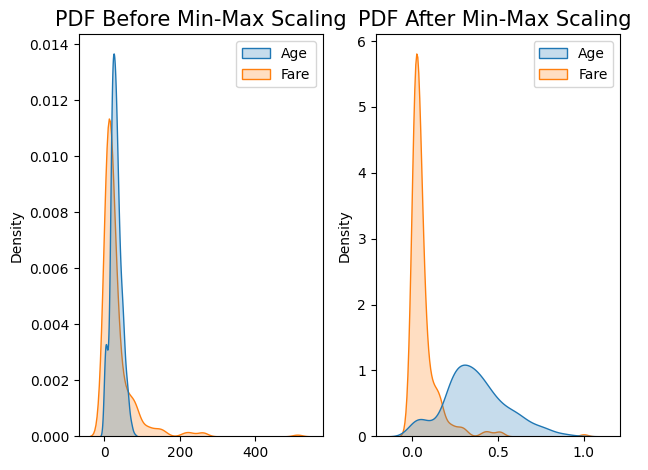

In [20]:
plt.subplot(1, 2, 1)
plt.title("PDF Before Min-Max Scaling", fontsize=15)
sns.kdeplot(data=df, color="blue", fill=True)
plt.subplot(1, 2, 2)
plt.title("PDF After Min-Max Scaling ", fontsize=15)
sns.kdeplot(data=scaled_df, color="red", fill=True)
plt.tight_layout()
plt.show()

#### 2. Using Libraries

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for MinMax scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])

Time taken for MinMax scaling: 0.007982 seconds


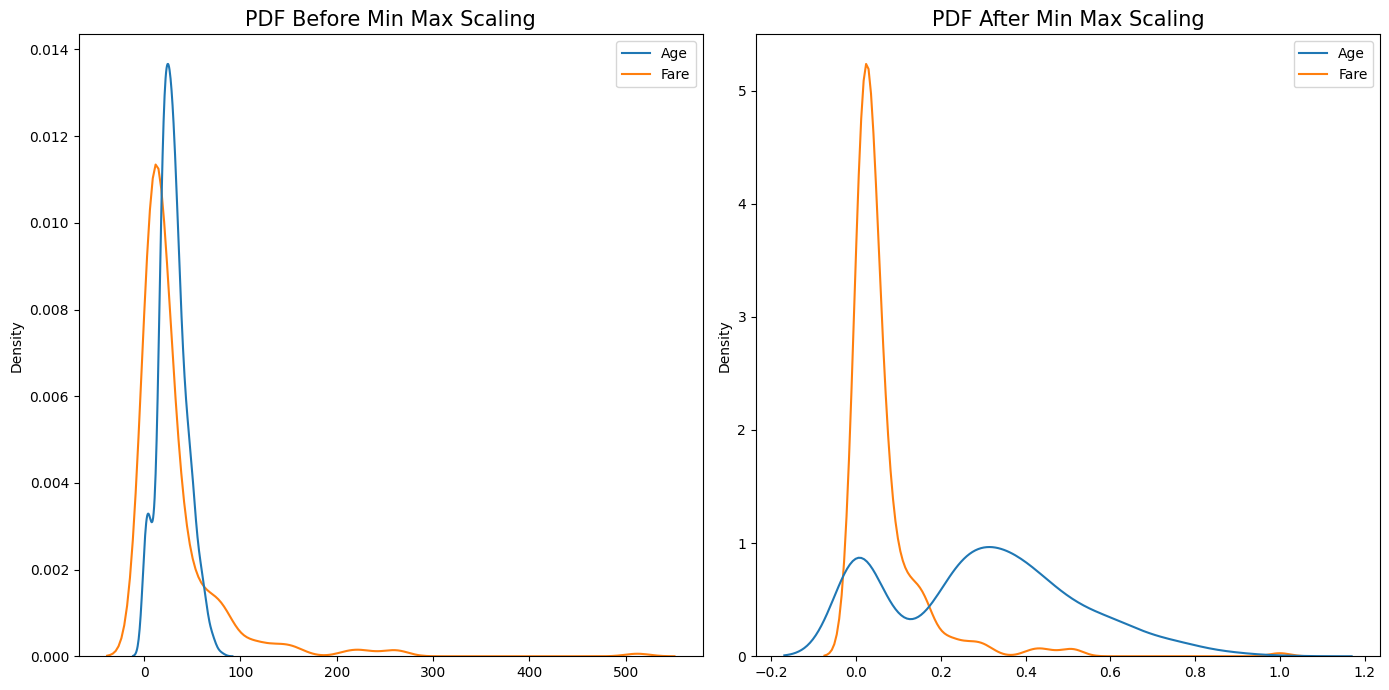

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Min Max Scaling", fontsize=15)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Min Max Scaling", fontsize=15)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

### <B>Comparision:<br>

Both manual Min-Max scaling and MinMaxScaler from sklearn produce the same results mathematically, but the MinMaxScaler is more reliable and efficient. While the manual approach can be prone to errors, especially in handling edge cases like missing values or division by zero, MinMaxScaler is optimized, handles edge cases gracefully, and is less error-prone. Thus, while both methods are accurate, MinMaxScaler is the safer and more consistent choice for real-world datasets.

 #### Max Absolute Scaling

#### 1. Using Python Function

In [26]:
def max_abs_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [abs(row[col]) if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'max_abs': max(col_values)}  
    # Apply MaxAbs scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            max_abs = column_stats[col]['max_abs']
            value = row[col] if row[col] is not None else 0  
            # Perform MaxAbs scaling
            if max_abs != 0:  
                scaled_row[col] = value / max_abs
            else:
                scaled_row[col] = 0  
        scaled_data.append(scaled_row)
    
    return scaled_data
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])


data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

# Perform MaxAbs Scaling
start_time = time.time()
scaled_data = max_abs_scaler(data_list, columns_to_scale)
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data)

Time taken for Max Absolute Scaling: 0.001589 seconds


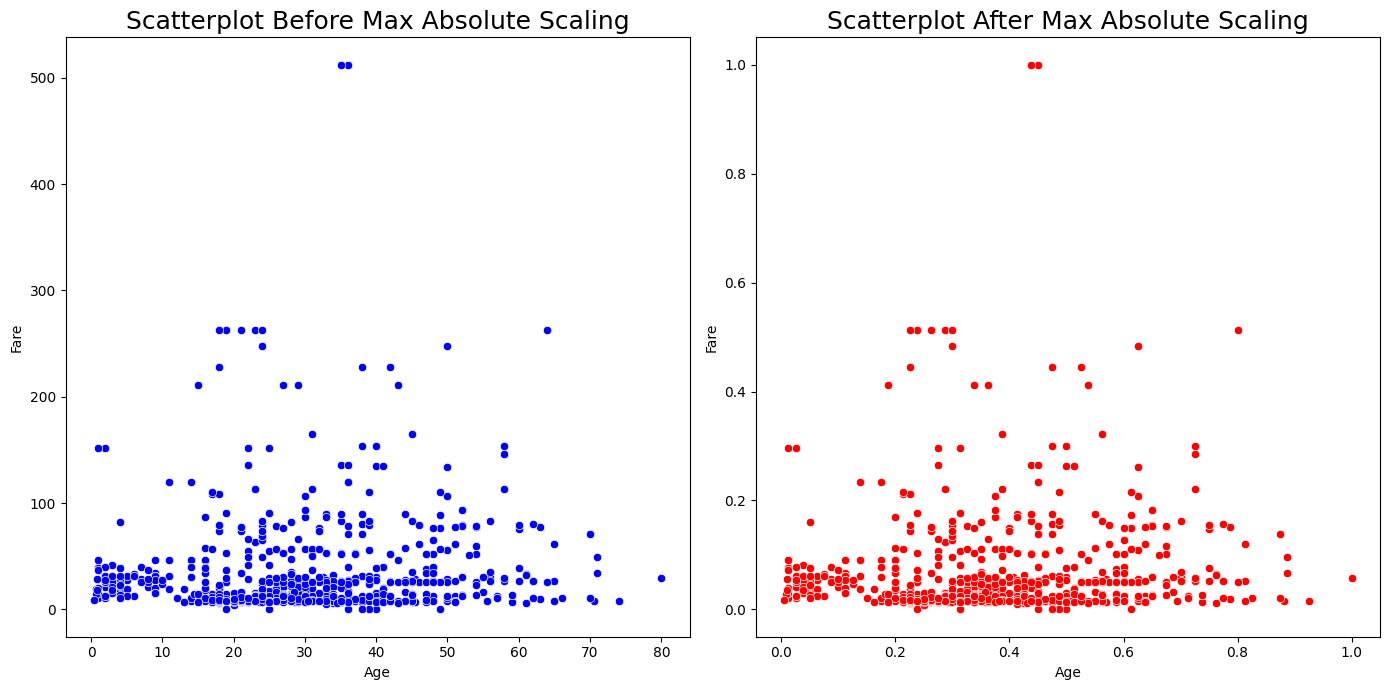

In [27]:

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=df['Age'], y=df['Fare'], color="blue")
plt.subplot(1, 2, 2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=scaled_df['Age'], y=scaled_df['Fare'], color="red")
plt.tight_layout()
plt.show()

#### 2. Using Libraries

In [28]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Max Absolute Scaling scaling: 0.006308 seconds


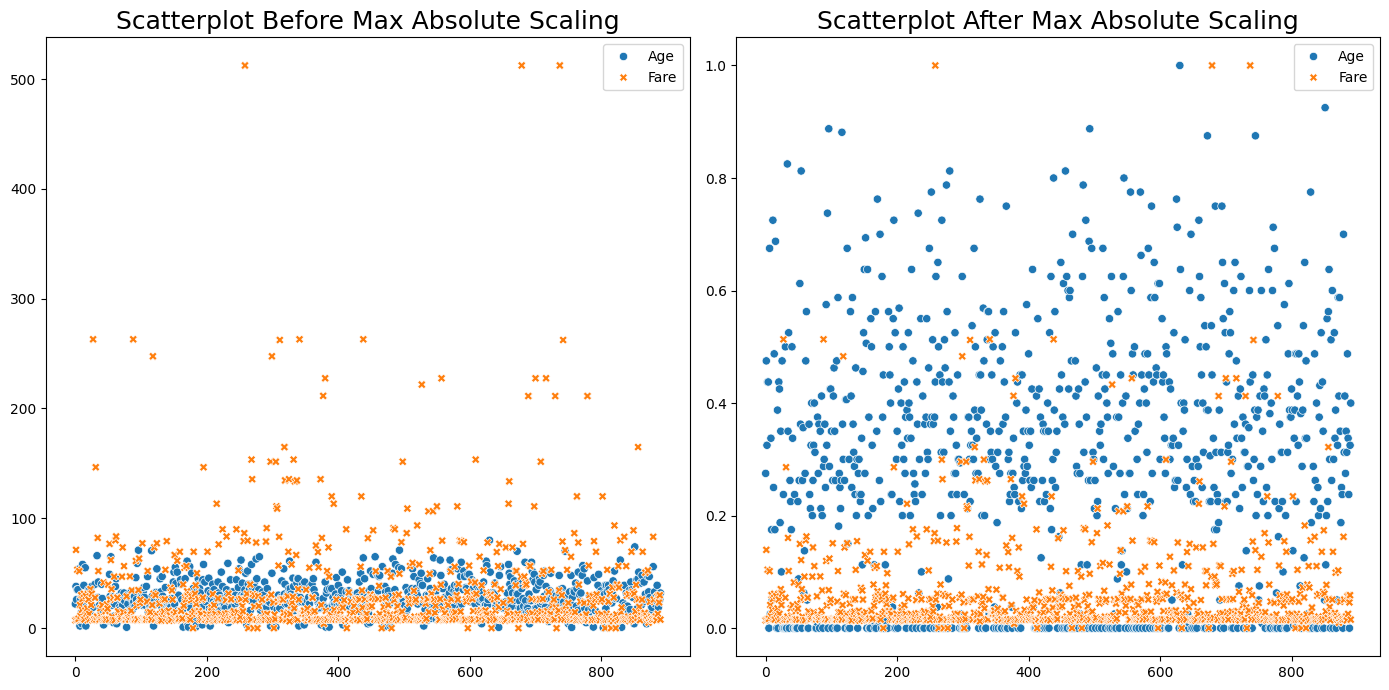

In [29]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

#### <b>Comparision:<br>

Both the custom max_abs_scaler function and the MaxAbsScaler from sklearn produce the same results in terms of accuracy, as they both implement the same MaxAbs scaling formula, dividing each value by the maximum absolute value in the column. However, the custom function is less efficient, especially for large datasets, as it is written in plain Python and requires manual iteration and additional memory usage. On the other hand, MaxAbsScaler is highly optimized, implemented in C, and performs better in terms of execution time and memory usage, particularly for large datasets. While both methods are accurate, MaxAbsScaler from sklearn is the preferred choice for its better performance and robustness, especially in production environments.

##  Robust Scaling

#### 1. Using Python Function

In [31]:
def robust_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        median = sorted(col_values)[len(col_values)//2]  
        sorted_values = sorted(col_values)
        q1 = sorted_values[len(col_values)//4]  
        q3 = sorted_values[(3*len(col_values))//4]  
        iqr = q3 - q1 
        column_stats[col] = {'median': median, 'iqr': iqr}

   # Apply Robust Scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            median = column_stats[col]['median']
            iqr = column_stats[col]['iqr']
            value = row[col] if row[col] is not None else 0  

            if iqr != 0: 
                scaled_row[col] = (value - median) / iqr
            else:
                scaled_row[col] = 0  
        scaled_data.append(scaled_row)
    
    return scaled_data
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

start_time = time.time()
scaled_data = robust_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data)

Time taken for Robust Scaling: 0.001745 seconds


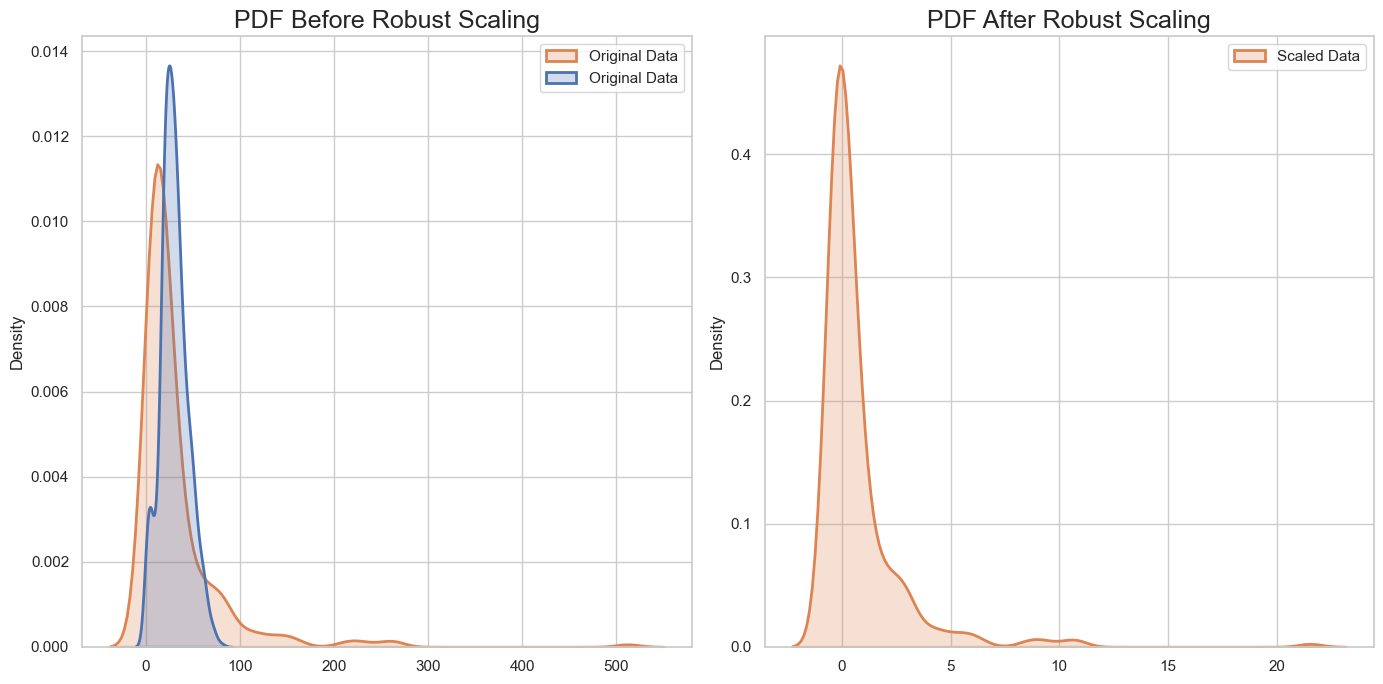

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data=df, color="blue", shade=True, linewidth=2, label="Original Data")  
plt.legend()
plt.subplot(1, 2, 2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data=scaled_df, color="red", shade=True, linewidth=2, label="Scaled Data")  
plt.legend()
plt.tight_layout()
plt.show()


#### 2. Using Libraries

In [34]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
start_time = time.time()

scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Robust Scaling scaling: 0.011519 seconds


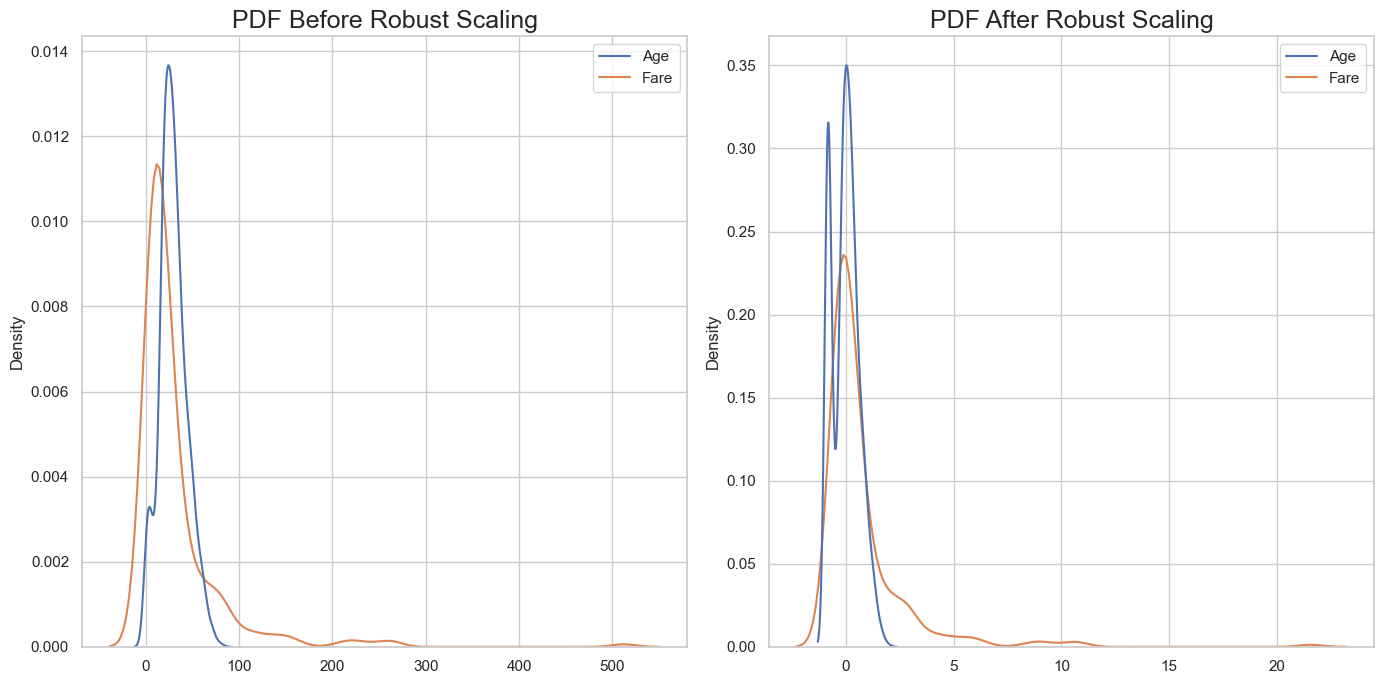

In [35]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

### <b> Comparision:<br>

The RobustScaler from sklearn and the custom robust_scaler function both achieve the same goal of scaling data based on the interquartile range (IQR) and median, but they differ in terms of accuracy and performance. The sklearn RobustScaler is highly optimized and reliable, providing accurate results with efficient handling of missing data and outliers. It is faster, especially for large datasets, as it leverages built-in Cython code for performance. In contrast, the custom robust_scaler function, while functionally equivalent, is slower due to the need for manually calculating the median and IQR, and it may introduce errors if not implemented carefully. In terms of performance, the sklearn version is significantly faster and more scalable, making it the better choice for practical applications, whereas the custom function is more prone to inefficiency and potential errors but offers flexibility for custom processing.

# One Hot Encoding

### 1 Using Python function

In [39]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hydrabad', 'Chennai', 'Bangalore', 'Delhi', 'Hydrabad', 'Bangalore', 'Delhi']})
# One-Hot Encoding function
def one_hot_encoder(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=False)
    return encoded_data
encoded_data = one_hot_encoder(data, 'City')

encoded_data = encoded_data.astype(int)
data



,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [40]:
# Show the result
print(encoded_data)


   City_Bangalore  City_Chennai  City_Delhi  City_Hydrabad  City_Mumbai
0               0             0           1              0            0
1               0             0           0              0            1
2               0             0           0              1            0
3               0             1           0              0            0
4               1             0           0              0            0
5               0             0           1              0            0
6               0             0           0              1            0
7               1             0           0              0            0
8               0             0           1              0            0


### 2.Using Libraries

In [41]:
data=pd.DataFrame({'City':[
'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
]})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [42]:

data_encoded = encoder.fit_transform(data)
data_encoded

,City_Delhi,City_Mumbai,City_Hydrabad,City_Chennai,City_Bangalore
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0


# <B> Comparision:<BR>

When comparing manual one-hot encoding using pd.get_dummies and category_encoders.OneHotEncoder, both methods are accurate for encoding categorical data into binary format. pd.get_dummies is faster and more efficient for small datasets, offering a straightforward solution. However, it lacks flexibility when dealing with complex scenarios, such as handling missing or unknown categories. On the other hand, category_encoders.OneHotEncoder provides more advanced features like handling unseen categories and missing values, making it more suitable for larger, more complex datasets or real-world data with inconsistencies. While pd.get_dummies is ideal for quick, simple tasks, category_encoders.OneHotEncoder offers better performance and flexibility for larger, diverse datasets.
